In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [ ]:
data=pd.read_csv('/content/supermarket_sales -.csv')

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
df = data["Total"]

In [ ]:
mean_value = np.mean(df)
std_dev = np.std(df, ddof=1)

<Axes: ylabel='Count'>

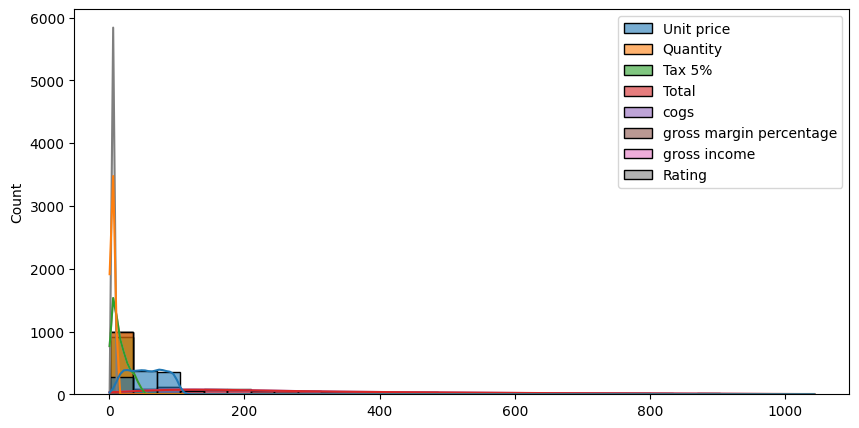

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, kde=True, color="blue", alpha=0.6, label="Histogram")

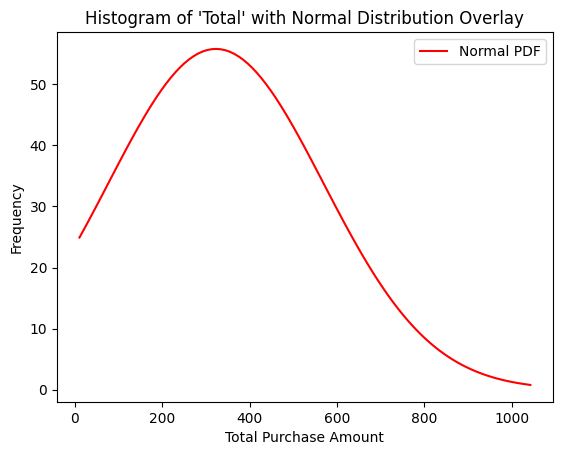

In [ ]:
# Overlay the normal distribution
x = np.linspace(min(df), max(df), 100)
pdf = norm.pdf(x, mean_value, std_dev)
plt.plot(x, pdf * len(df) * (max(df) - min(df)) / 30, "r-", label="Normal PDF")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.title("Histogram of 'Total' with Normal Distribution Overlay")
plt.legend()
plt.show()

In [ ]:
skewness = skew(df)
kurt = kurtosis(df)

In [ ]:
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 322.966749
Standard Deviation: 245.88533510097207
Skewness: 0.8912303920037631
Kurtosis: -0.08746991289329031


In [ ]:
random_samples = np.random.normal(mean_value, std_dev, 1000)

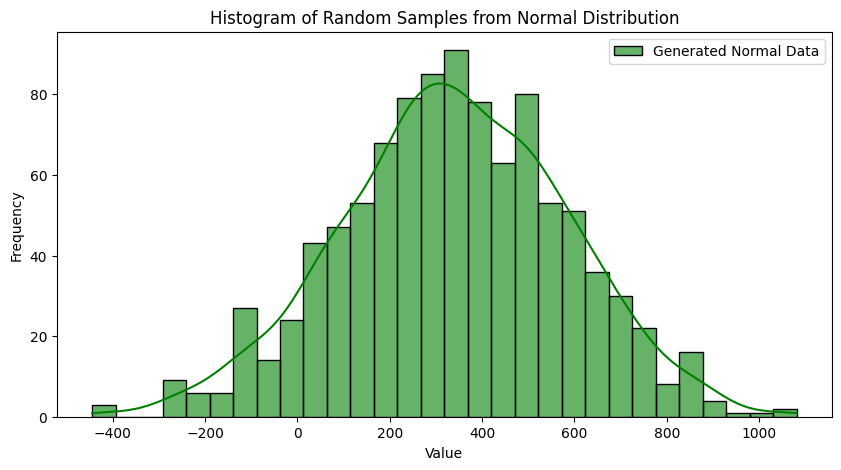

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(random_samples, bins=30, kde=True, color="green", alpha=0.6, label="Generated Normal Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Random Samples from Normal Distribution")
plt.legend()
plt.show()

In [ ]:
threshold = mean_value
probability = norm.cdf(threshold, mean_value, std_dev)
print(f"Probability that a randomly selected value is below the mean: {probability}")

Probability that a randomly selected value is below the mean: 0.5


In [ ]:
# Compute quantile (qnorm equivalent)
percentile_95 = norm.ppf(0.95, mean_value, std_dev)
print(f"95th percentile: {percentile_95}")

95th percentile: 727.412134255012


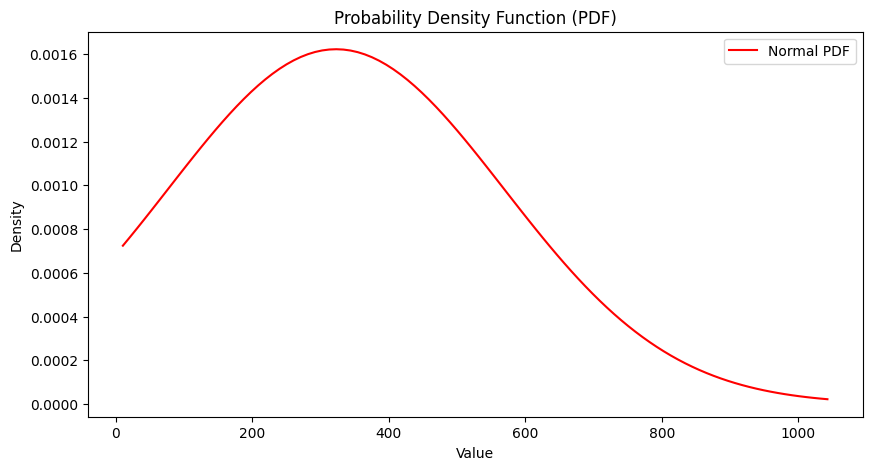

In [ ]:
# Compute and plot density function (dnorm equivalent)
pdf_values = norm.pdf(x, mean_value, std_dev)
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_values, label="Normal PDF", color="red")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

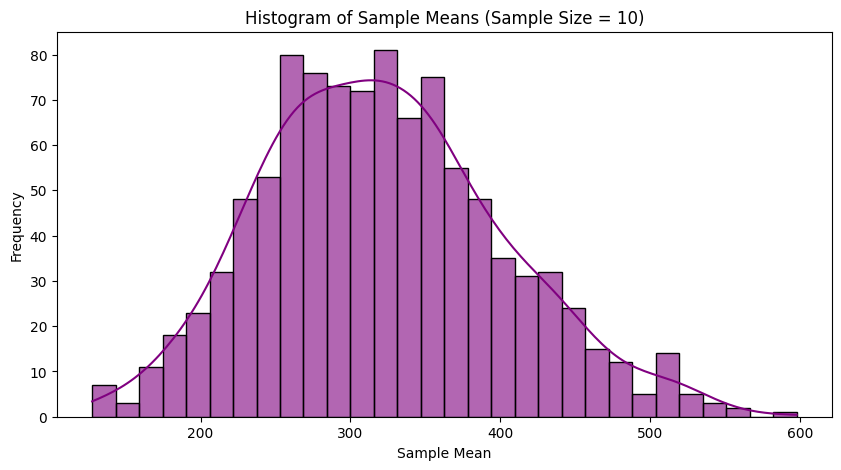

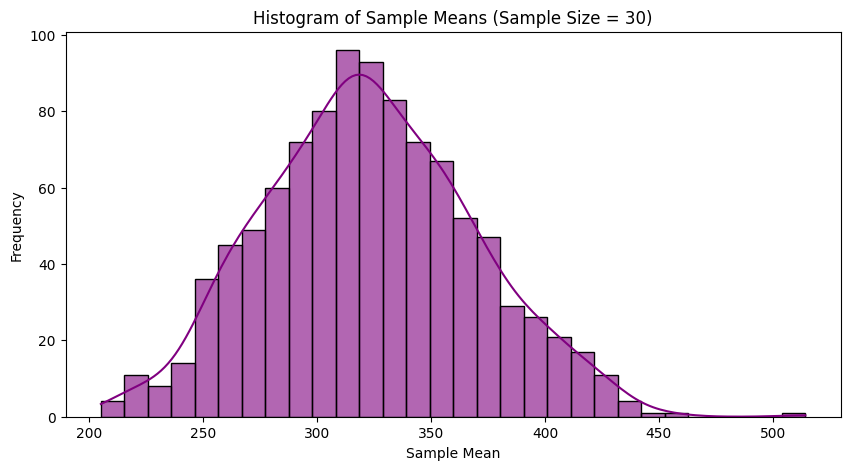

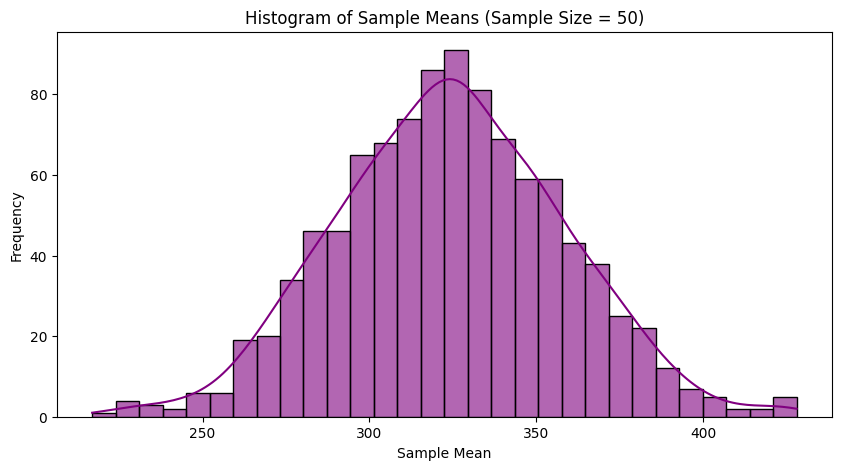

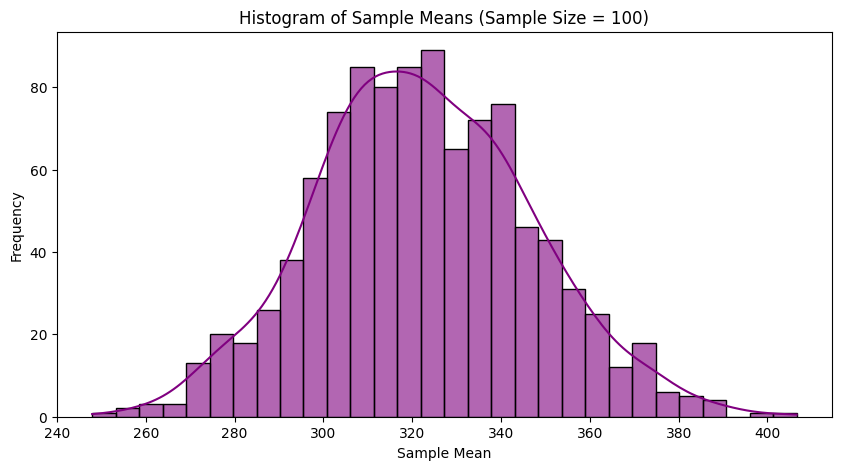

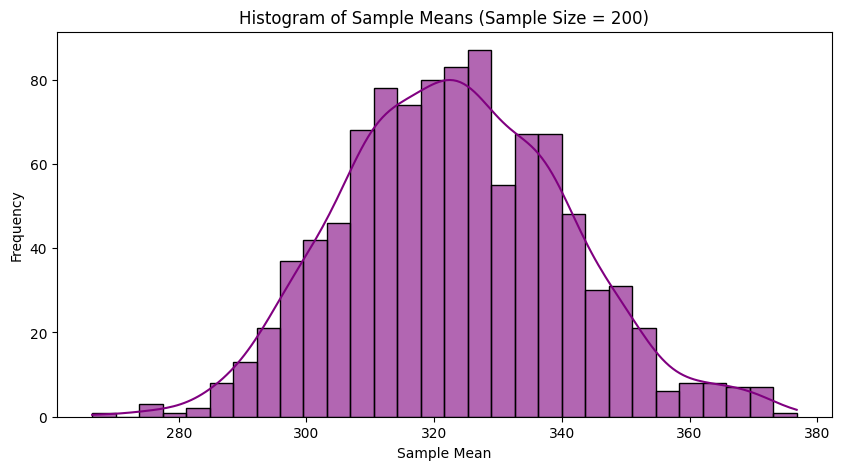

In [ ]:
# Verifying CLT for different sample sizes
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {}

for size in sample_sizes:
    means = [np.mean(np.random.choice(df, size=size, replace=True)) for _ in range(1000)]
    sample_means[size] = means

    plt.figure(figsize=(10, 5))
    sns.histplot(means, bins=30, kde=True, color="purple", alpha=0.6)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Sample Means (Sample Size = {size})")
    plt.show()

In [ ]:
# Compute skewness and kurtosis for original data and sample means
original_skewness = skew(df)
original_kurtosis = kurtosis(df)
print(f"Original Data - Skewness: {original_skewness}, Kurtosis: {original_kurtosis}")

for size, means in sample_means.items():
    sample_skewness = skew(means)
    sample_kurtosis = kurtosis(means)
    print(f"Sample Size {size} - Skewness: {sample_skewness}, Kurtosis: {sample_kurtosis}")

Original Data - Skewness: 0.8912303920037631, Kurtosis: -0.08746991289329031
Sample Size 10 - Skewness: 0.3355940579227317, Kurtosis: -0.07729076898303289
Sample Size 30 - Skewness: 0.18402292414542065, Kurtosis: -0.09672452588451375
Sample Size 50 - Skewness: 0.03493051966842806, Kurtosis: 0.03642710444635355
Sample Size 100 - Skewness: 0.14393230226555173, Kurtosis: -0.013859811268631894
Sample Size 200 - Skewness: 0.17907254995232566, Kurtosis: -0.04477942145922542


In [ ]:
# Compute 99th percentile (qnorm equivalent)
percentile_99 = norm.ppf(0.99, mean_value, std_dev)
print(f"99th percentile: {percentile_99}")

99th percentile: 894.981575569966


In [ ]:
df1 = data["cogs"]

In [ ]:
mean_value1 = np.mean(df1)
std_dev1 = np.std(df1, ddof=1)
print(f"Mean: {mean_value1}")
print(f"Standard Deviation: {std_dev1}")

Mean: 307.58738
Standard Deviation: 234.17650961997307


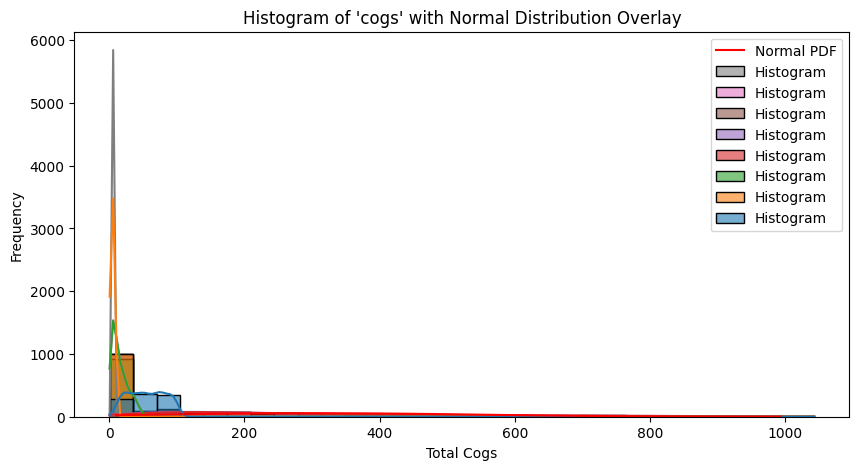

In [ ]:
# Plot histogram with normal distribution overlay
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, kde=True, color="blue", alpha=0.6, label="Histogram")

x = np.linspace(min(df1), max(df1), 100)
pdf = norm.pdf(x, mean_value1, std_dev1)
plt.plot(x, pdf * len(df1) * (max(df1) - min(df1)) / 30, "r-", label="Normal PDF")

plt.xlabel("Total Cogs")
plt.ylabel("Frequency")
plt.title("Histogram of 'cogs' with Normal Distribution Overlay")
plt.legend()
plt.show()

In [ ]:
random_samples1 = np.random.normal(mean_value1, std_dev1, 1000)

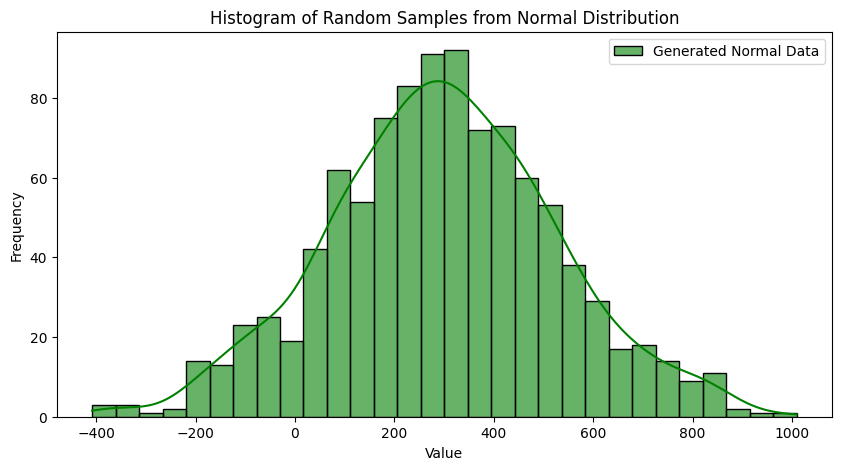

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(random_samples1, bins=30, kde=True, color="green", alpha=0.6, label="Generated Normal Data")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Random Samples from Normal Distribution")
plt.legend()
plt.show()

In [ ]:
# Compute cumulative probability (pnorm equivalent)
threshold = mean_value1
probability = norm.cdf(threshold, mean_value1, std_dev1)
print(f"Probability that a randomly selected value is below the mean: {probability}")

Probability that a randomly selected value is below the mean: 0.5


In [ ]:
# Compute quantile (qnorm equivalent)
percentile_95 = norm.ppf(0.95, mean_value1, std_dev1)
print(f"95th percentile: {percentile_95}")

95th percentile: 692.773461195249


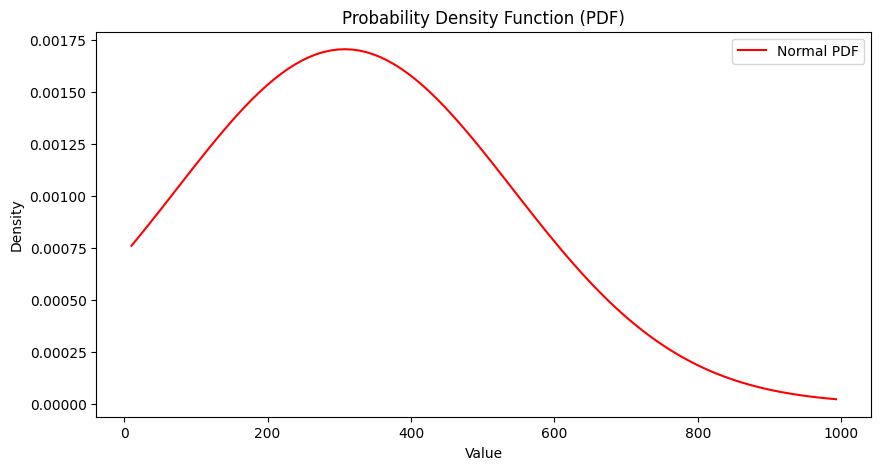

In [ ]:
pdf_values = norm.pdf(x, mean_value1, std_dev1)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf_values, label="Normal PDF", color="red")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

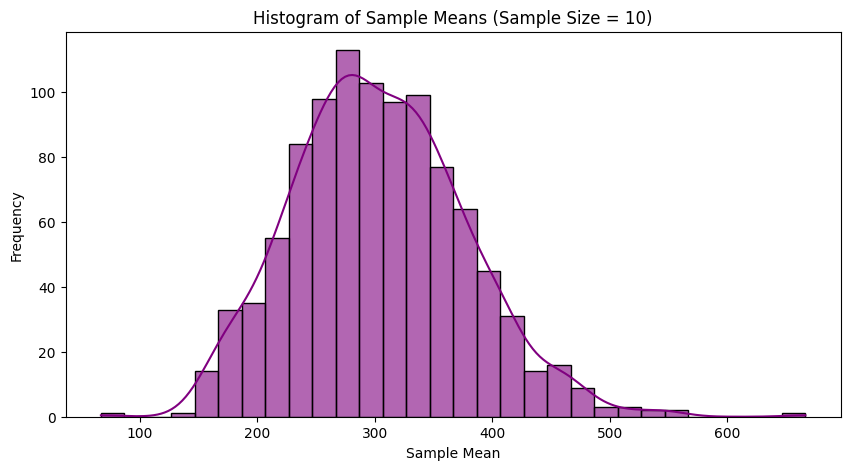

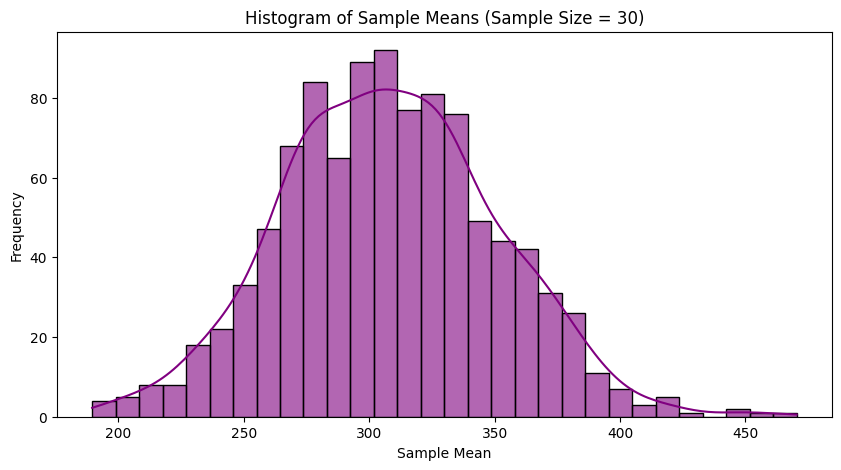

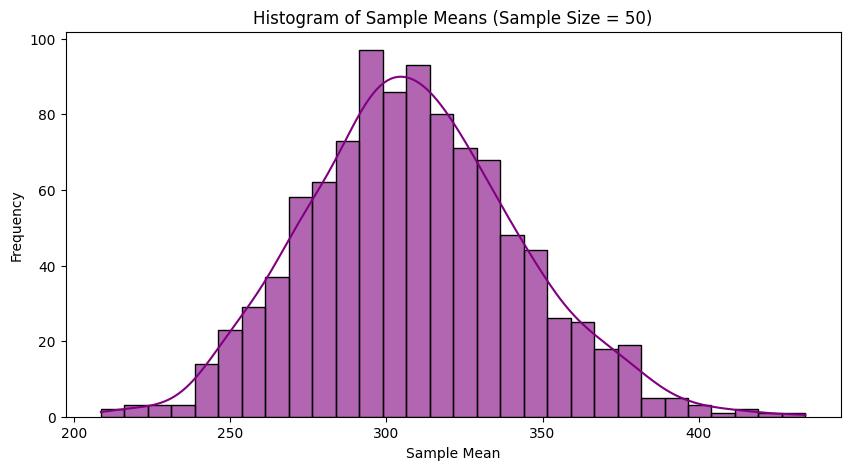

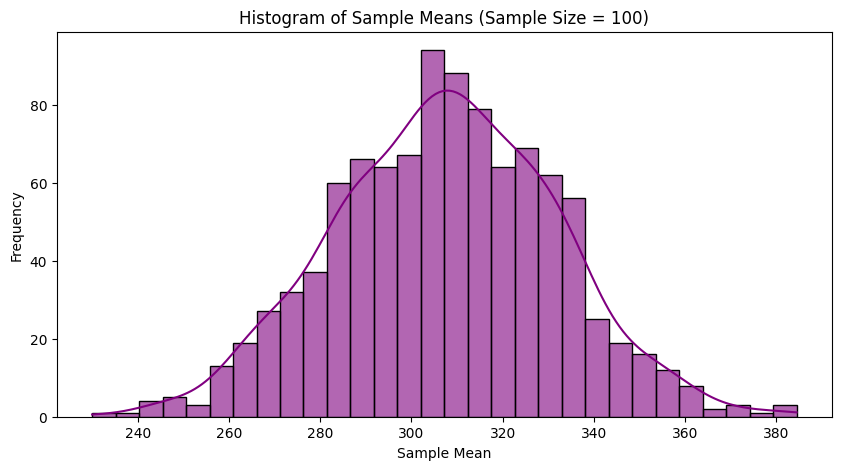

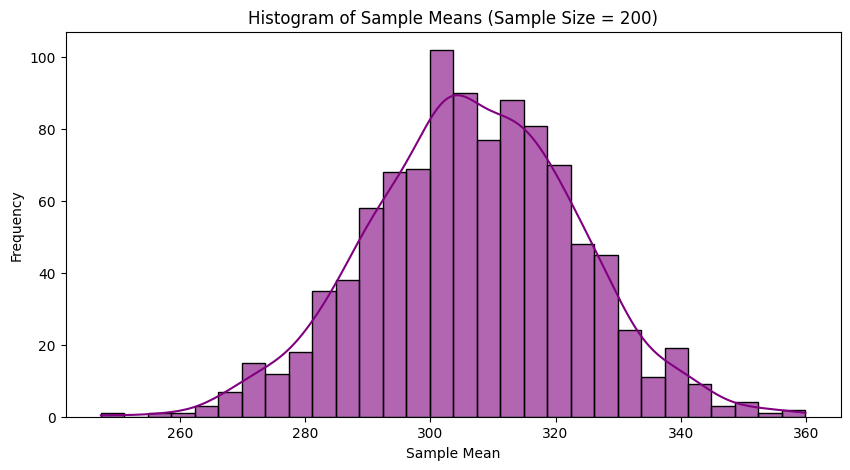

In [ ]:
# Verifying CLT for different sample sizes
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {}

for size in sample_sizes:
    means = [np.mean(np.random.choice(df1, size=size, replace=True)) for _ in range(1000)]
    sample_means[size] = means

    plt.figure(figsize=(10, 5))
    sns.histplot(means, bins=30, kde=True, color="purple", alpha=0.6)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Sample Means (Sample Size = {size})")
    plt.show()

In [ ]:
original_skewness = skew(df1)
original_kurtosis = kurtosis(df1)
print(f"Original Data - Skewness: {original_skewness}, Kurtosis: {original_kurtosis}")

Original Data - Skewness: 0.8912303920037631, Kurtosis: -0.08746991289328943


In [ ]:
for size, means in sample_means.items():
    sample_skewness = skew(means)
    sample_kurtosis = kurtosis(means)
    print(f"Sample Size {size} - Skewness: {sample_skewness}, Kurtosis: {sample_kurtosis}")

Sample Size 10 - Skewness: 0.39351772716018535, Kurtosis: 0.4915885904630932
Sample Size 30 - Skewness: 0.1544485231561638, Kurtosis: 0.08959886163950737
Sample Size 50 - Skewness: 0.2348911151964616, Kurtosis: 0.12047218887297717
Sample Size 100 - Skewness: -0.009611216368020373, Kurtosis: -0.05898694182997932
Sample Size 200 - Skewness: -0.02311255229674153, Kurtosis: 0.10126386111074881


In [ ]:
# Compute 99th percentile (qnorm equivalent)
percentile_99 = norm.ppf(0.99, mean_value1, std_dev1)
print(f"99th percentile: {percentile_99}")

99th percentile: 852.3634053047288
